# Распознавание объектов на изображениях из набора данных CIFAR-10

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/cnn/tensorflow/cifar10.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Просмотр примеров данных**

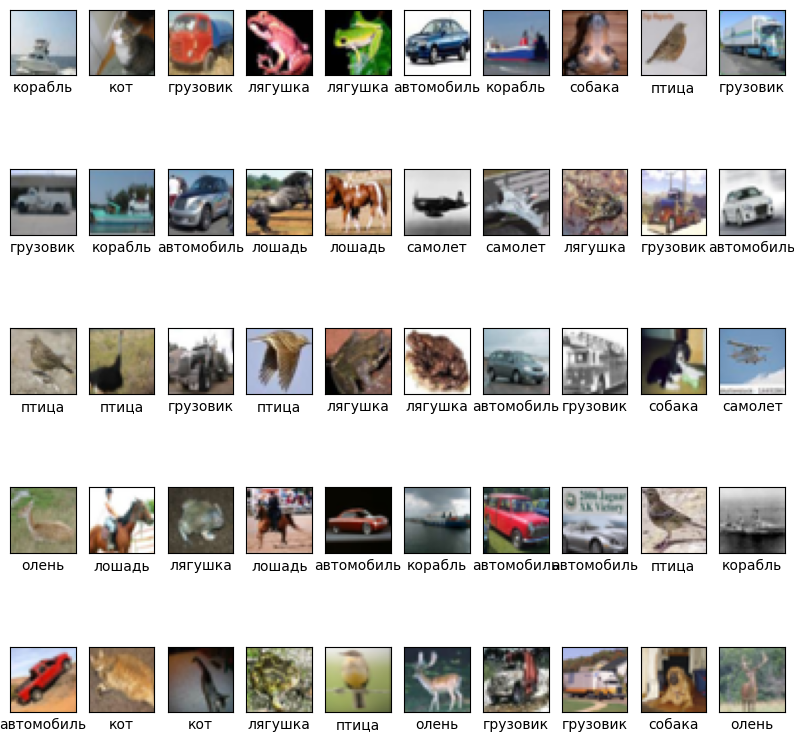

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])

## Создаем нейронную сеть

In [22]:
# Создаем последовательную модель
model = Sequential(
    [
        # Предварительная обработка: нормализация
        Rescaling(1./255),
        # Первый сверточный слой
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        # Первый слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Второй сверточный слой
        Conv2D(64, (3, 3), activation='relu'),
        # Второй слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Слой преобразования данных из 2D представления в плоское
        Flatten(),
        # Полносвязный слой для классификации
        Dense(512, activation='relu'),
        # Слой регуляризации Dropout
        Dropout(0.5),
        # Выходной полносвязный слой
        Dense(10, activation='softmax')
    ]
)

**Компилируем модель**

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [24]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=25,
              validation_split=0.1,
              verbose=1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3948 - loss: 1.6639 - val_accuracy: 0.5430 - val_loss: 1.3139
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5430 - loss: 1.2794 - val_accuracy: 0.6140 - val_loss: 1.1244
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5972 - loss: 1.1357 - val_accuracy: 0.6642 - val_loss: 0.9850
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6282 - loss: 1.0483 - val_accuracy: 0.6716 - val_loss: 0.9424
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6516 - loss: 0.9862 - val_accuracy: 0.6924 - val_loss: 0.8895
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6689 - loss: 0.9359 - val_accuracy: 0.7008 - val_loss: 0.8683
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6869 - loss: 0.8881 - val_accuracy: 0.7170 - val_loss: 0.8244
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6955 - loss: 0.8600 - val_ac

## Оцениваем качетсво обучения сети

In [25]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7550 - loss: 0.7434


In [26]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 75.5


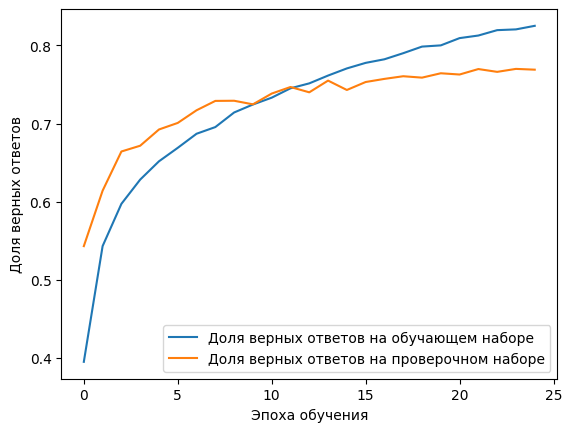

In [27]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

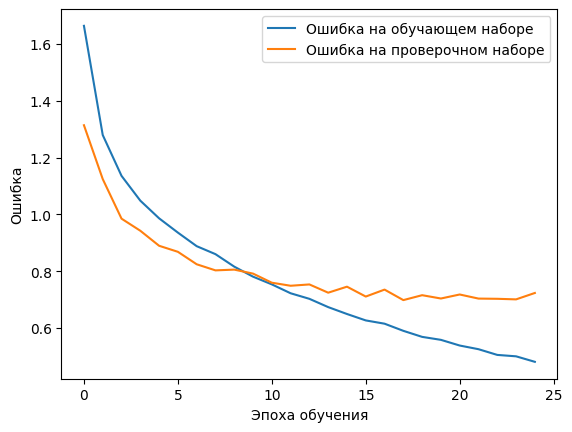

In [28]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [29]:
model.save("cifar10.keras")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

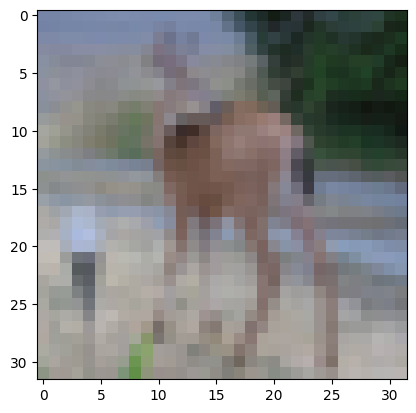

In [36]:
index=100
plt.imshow(x_test[index])
plt.show()

**Преобразование тестового изображения**

In [37]:
x = x_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [38]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


**Печатаем результаты распознавания**

In [39]:
print(prediction)

[[1.5945718e-04 2.0707914e-06 6.8101913e-02 1.0786358e-01 4.7056004e-01
  2.3721792e-01 2.1024812e-02 9.0944551e-02 4.0852269e-03 4.0403000e-05]]


**Преобразуем результаты из формата one hot encoding**

In [40]:
prediction = np.argmax(prediction)
print(classes[prediction])

олень


**Печатаем правильный ответ**

In [41]:
print(classes[y_test[index][0]])

олень


## Распознаем дополнительное изображение

**Смотрим загруженную картинку**

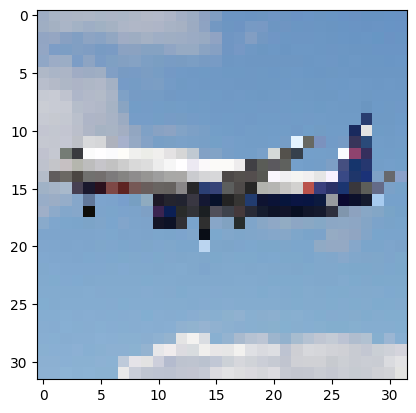

In [49]:
img_path = '../plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [50]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [51]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [52]:
prediction

array([[9.9999940e-01, 5.2117952e-07, 2.0402046e-08, 1.5467365e-11,
        3.6350358e-14, 2.0281463e-15, 2.6195998e-19, 1.0508643e-16,
        3.8530636e-08, 3.4263969e-08]], dtype=float32)

In [53]:
prediction = np.argmax(prediction)


In [54]:
prediction

np.int64(0)

In [55]:
print(classes[prediction])

самолет


**Обязательно попробуйте распознать свои изображения!**

## Идеи по улучшению качества решения

1. Попробуйте использовать разное количество блоков слой свертки + слой подвыборки.
2. Используйте разное количество сверточных слоев в блоке (1, 2, 3).
3. Используйте разные размеры свертки (3х3, 5х5, 7х7).
4. Используйте разное количество нейронов в полносвязном слое.
5. Используйте несколько полносвязных слоев.
6. Используйте разное значение параметра dropout rate.
7. Используйте разное количество эпох: 10, 20, 30, 50, 100.
8. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
9. Используйте разные [оптимизаторы](https://keras.io/api/optimizers/): adam, rmsprop и другие.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.